In [141]:
import pandas as pd # import pandas 
import os 
bookings = pd.read_csv("/Users/brindamunuswamy/Desktop/MIS581/h2Features.csv") # read CSV into pandas
bookings.head(15) #reading top 5 rows

,is_canceled,lead_time,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,different_assigned_room
0,0,6,2,1,0.0,0,2,7,4,0,0,0,0,1,0,3,0,0,0
1,1,88,4,2,0.0,0,1,6,4,0,0,0,0,1,0,3,0,1,0
2,1,65,4,1,0.0,0,1,6,4,0,0,0,0,1,0,3,0,1,0
3,1,92,4,2,0.0,0,1,6,4,0,0,0,0,1,0,3,0,2,0
4,1,100,2,2,0.0,0,1,6,4,0,0,0,0,1,0,3,0,1,0
5,1,79,3,2,0.0,0,1,6,4,0,0,0,0,1,0,3,0,1,0
6,0,3,3,1,0.0,0,2,5,4,0,0,0,1,1,0,4,0,0,0
7,1,63,3,1,0.0,0,1,6,4,0,0,0,0,1,0,3,0,0,0
8,1,62,3,2,0.0,0,1,6,4,0,0,0,0,1,0,3,0,1,0
9,1,62,3,2,0.0,0,1,6,4,0,0,0,0,1,0,3,0,1,0


In [142]:
bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     79330 non-null  int64  
 1   lead_time                       79330 non-null  int64  
 2   stays_in_week_nights            79330 non-null  int64  
 3   adults                          79330 non-null  int64  
 4   children                        79330 non-null  float64
 5   babies                          79330 non-null  int64  
 6   meal                            79330 non-null  int64  
 7   market_segment                  79330 non-null  int64  
 8   distribution_channel            79330 non-null  int64  
 9   is_repeated_guest               79330 non-null  int64  
 10  previous_cancellations          79330 non-null  int64  
 11  previous_bookings_not_canceled  79330 non-null  int64  
 12  booking_changes                 

In [143]:
bookings['is_canceled'].value_counts() 

0    46228
1    33102
Name: is_canceled, dtype: int64

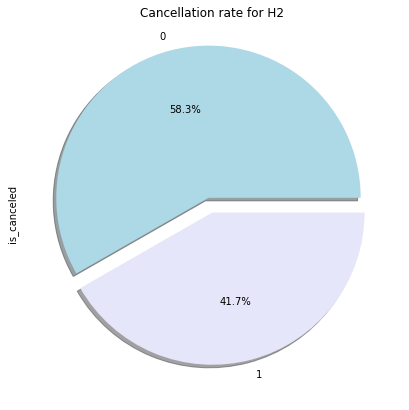

In [144]:
bookings['is_canceled'].value_counts() #benchmark cancellation rate for h2
import matplotlib.pyplot as plt
piedata = bookings['is_canceled'].value_counts()
my_colors = ['lightblue','lavender'] # custom colors
my_explode = (0.1,0) # custom effects
plt.figure(figsize=(7,7)) #custom size for the pie chart
piedata.plot.pie(autopct="%.1f%%",colors=my_colors,explode=my_explode,shadow=True) #pie chart creation
plt.title("Cancellation rate for H2")
plt.show()

In [145]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [146]:
X=bookings.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]] # creating data set with predictor variables only 
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   lead_time                       79330 non-null  int64  
 1   stays_in_week_nights            79330 non-null  int64  
 2   adults                          79330 non-null  int64  
 3   children                        79330 non-null  float64
 4   babies                          79330 non-null  int64  
 5   meal                            79330 non-null  int64  
 6   market_segment                  79330 non-null  int64  
 7   distribution_channel            79330 non-null  int64  
 8   is_repeated_guest               79330 non-null  int64  
 9   previous_cancellations          79330 non-null  int64  
 10  previous_bookings_not_canceled  79330 non-null  int64  
 11  booking_changes                 79330 non-null  int64  
 12  deposit_type                    

In [147]:
#df = df.astype({"Column 1": float, "Column 2": int})
#X=X.astype({"adr": int})

In [148]:
Y = bookings.iloc[:,[0]] # data set with dependent variable only 
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   is_canceled  79330 non-null  int64
dtypes: int64(1)
memory usage: 619.9 KB


In [149]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3) 
# splitting data set into training and valication sets in 70-30 

In [150]:
Y_train['is_canceled'].value_counts() # checking for cancelled data count in training set 

0    32388
1    23143
Name: is_canceled, dtype: int64

In [151]:
Y_test['is_canceled'].value_counts() # checking for cancelled data count in test set 

0    13840
1     9959
Name: is_canceled, dtype: int64

In [157]:
import numpy as np
XGBmodel = XGBClassifier(eval_metric='error',use_label_encoder=False)
XGBmodel.fit(X_train, np.ravel(Y_train)) 
# fit of XGBmodel to the training set with descriptor variable and dependent variable

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='error',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [158]:
Y_pred = XGBmodel.predict(X_test) # Predictions for test data set
predictions = [round(value) for value in Y_pred]

In [159]:
accuracy = accuracy_score(Y_test, predictions) # accuracy metrics for the model fit 
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 83.54%


In [160]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, Y_pred)) # confusion matrix of the model predictions and actuals 

[[12654  1186]
 [ 2731  7228]]


In [161]:
print(classification_report(Y_test, Y_pred)) 
# classification report of the predictions vs actuals for both class types

              precision    recall  f1-score   support

           0       0.82      0.91      0.87     13840
           1       0.86      0.73      0.79      9959

    accuracy                           0.84     23799
   macro avg       0.84      0.82      0.83     23799
weighted avg       0.84      0.84      0.83     23799



In [162]:
xgb_score = cross_val_score(XGBmodel, X, np.ravel(Y), cv=10, scoring='roc_auc')
print("Mean AUC Score - XGBoost: ", xgb_score.mean())
# AUC score of the model 

Mean AUC Score - XGBoost:  0.8565685112656499


In [165]:
df = pd.DataFrame(data=Y_pred, columns=["canceled"])
df['canceled'].value_counts()
# checking counts of cancellations in the predicted data set

0    15385
1     8414
Name: canceled, dtype: int64

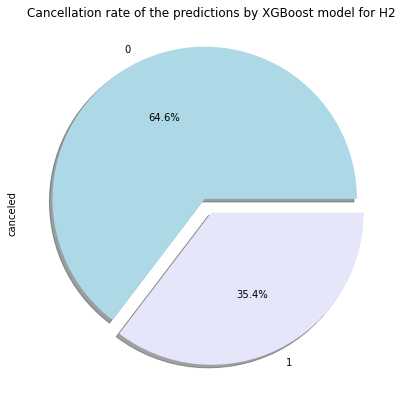

In [166]:
import matplotlib.pyplot as plt
piedata = df['canceled'].value_counts()
my_colors = ['lightblue','lavender'] # custom colors
my_explode = (0.1,0) # custom effects
plt.figure(figsize=(7,7)) #custom size for the pie chart
piedata.plot.pie(autopct="%.1f%%",colors=my_colors,explode=my_explode,shadow=True) #pie chart creation
plt.title("Cancellation rate of the predictions by XGBoost model for H2")
plt.show() # displaying only chart without the extra information
#benchmark


In [167]:
whatif_leadtime = X.copy() # copy of original data set with features selected for model 
whatif_leadtime.loc[whatif_leadtime.lead_time !=569874574,"lead_time"] = 10 
# replace all lead times in the data set with 10 
whatif_leadtime.info() # checking for data types in the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   lead_time                       79330 non-null  int64  
 1   stays_in_week_nights            79330 non-null  int64  
 2   adults                          79330 non-null  int64  
 3   children                        79330 non-null  float64
 4   babies                          79330 non-null  int64  
 5   meal                            79330 non-null  int64  
 6   market_segment                  79330 non-null  int64  
 7   distribution_channel            79330 non-null  int64  
 8   is_repeated_guest               79330 non-null  int64  
 9   previous_cancellations          79330 non-null  int64  
 10  previous_bookings_not_canceled  79330 non-null  int64  
 11  booking_changes                 79330 non-null  int64  
 12  deposit_type                    

In [168]:
whatif_leadtime['lead_time'].value_counts() # checking if entire data set has lead time as desired 

10    79330
Name: lead_time, dtype: int64

In [169]:
LT_pred = XGBmodel.predict(whatif_leadtime) # predictions for what-if data with lead time = 10

In [170]:
df = pd.DataFrame(data=LT_pred, columns=["Is_Canceled"]) # converting and labeling predictions 
df['Is_Canceled'].value_counts()

0    54986
1    24344
Name: Is_Canceled, dtype: int64

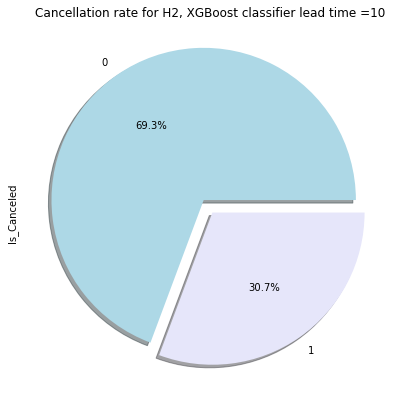

In [171]:
piedata = df['Is_Canceled'].value_counts()  # cancellation rate for pred based on test data set
my_colors = ['lightblue','lavender'] # custom colors
my_explode = (0.1,0) # custom effects
plt.figure(figsize=(7,7)) #custom size for the pie chart
piedata.plot.pie(autopct="%.1f%%",colors=my_colors,explode=my_explode,shadow=True) #pie chart creation
plt.title("Cancellation rate for H2, XGBoost classifier lead time =10 ")
plt.show() # displaying only chart without the extra information

In [172]:
from sklearn import metrics
accuracy = metrics.accuracy_score(Y, LT_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 80.47%


In [173]:
whatif_channel = X.copy() # creating fresh copy to do what if analysis based on distribution channel
whatif_channel['distribution_channel'].value_counts()

4    68945
2     6780
1     3408
3      193
5        4
Name: distribution_channel, dtype: int64

In [174]:
whatif_channel.loc[whatif_channel.distribution_channel==1,"distribution_channel"] = 2
whatif_channel.loc[whatif_channel.distribution_channel==2,"distribution_channel"] = 2
whatif_channel.loc[whatif_channel.distribution_channel==3,"distribution_channel"] = 2
whatif_channel.loc[whatif_channel.distribution_channel==4,"distribution_channel"] = 2
whatif_channel.loc[whatif_channel.distribution_channel==5,"distribution_channel"] = 2
#replacing all distribution channel data point with 2, which corresponds to direct web 
whatif_channel['distribution_channel'].value_counts()

2    79330
Name: distribution_channel, dtype: int64

In [175]:
#whatif_channel=whatif_channel.astype({"distribution_channel": int})
whatif_leadtime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   lead_time                       79330 non-null  int64  
 1   stays_in_week_nights            79330 non-null  int64  
 2   adults                          79330 non-null  int64  
 3   children                        79330 non-null  float64
 4   babies                          79330 non-null  int64  
 5   meal                            79330 non-null  int64  
 6   market_segment                  79330 non-null  int64  
 7   distribution_channel            79330 non-null  int64  
 8   is_repeated_guest               79330 non-null  int64  
 9   previous_cancellations          79330 non-null  int64  
 10  previous_bookings_not_canceled  79330 non-null  int64  
 11  booking_changes                 79330 non-null  int64  
 12  deposit_type                    

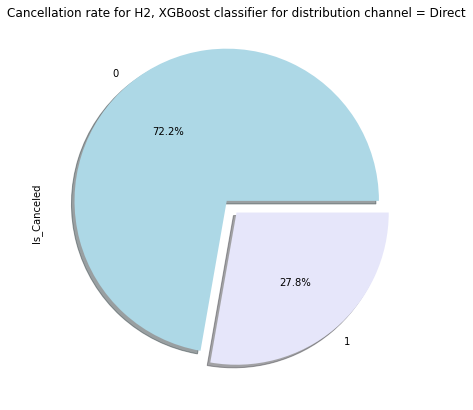

In [176]:
DC_pred = XGBmodel.predict(whatif_channel)
df = pd.DataFrame(data=DC_pred, columns=["Is_Canceled"])
df['Is_Canceled'].value_counts()
piedata = df['Is_Canceled'].value_counts()  # cancellation rate for pred based on test data set
my_colors = ['lightblue','lavender'] # custom colors
my_explode = (0.1,0) # custom effects
plt.figure(figsize=(7,7)) #custom size for the pie chart
piedata.plot.pie(autopct="%.1f%%",colors=my_colors,explode=my_explode,shadow=True) #pie chart creation
plt.title("Cancellation rate for H2, XGBoost classifier for distribution channel = Direct")
plt.show() # displaying only chart without the extra information

In [177]:
accuracy = metrics.accuracy_score(Y, DC_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 81.56%


In [178]:
whatif_paid = X.copy()
whatif_paid['deposit_type'].value_counts()

1    66442
2    12868
3       20
Name: deposit_type, dtype: int64

In [179]:

whatif_paid.loc[whatif_paid.deposit_type==1,"deposit_type"] = 1
whatif_paid.loc[whatif_paid.deposit_type==2,"deposit_type"] = 1
whatif_paid.loc[whatif_paid.deposit_type==3,"deposit_type"] = 1
whatif_paid['deposit_type'].value_counts()
# replacing all deposit type data points with 1 which corresponds to no-deposit

1    79330
Name: deposit_type, dtype: int64

In [180]:
#whatif_paid=whatif_paid.astype({"deposit_type": int})
whatif_paid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   lead_time                       79330 non-null  int64  
 1   stays_in_week_nights            79330 non-null  int64  
 2   adults                          79330 non-null  int64  
 3   children                        79330 non-null  float64
 4   babies                          79330 non-null  int64  
 5   meal                            79330 non-null  int64  
 6   market_segment                  79330 non-null  int64  
 7   distribution_channel            79330 non-null  int64  
 8   is_repeated_guest               79330 non-null  int64  
 9   previous_cancellations          79330 non-null  int64  
 10  previous_bookings_not_canceled  79330 non-null  int64  
 11  booking_changes                 79330 non-null  int64  
 12  deposit_type                    

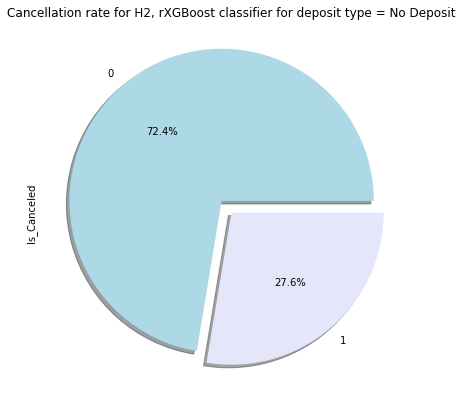

In [181]:
DT_pred = XGBmodel.predict(whatif_paid)
df = pd.DataFrame(data=DT_pred, columns=["Is_Canceled"])
df['Is_Canceled'].value_counts()
piedata = df['Is_Canceled'].value_counts()  # cancellation rate for pred based on test data set
my_colors = ['lightblue','lavender'] # custom colors
my_explode = (0.1,0) # custom effects
plt.figure(figsize=(7,7)) #custom size for the pie chart
piedata.plot.pie(autopct="%.1f%%",colors=my_colors,explode=my_explode,shadow=True) #pie chart creation
plt.title("Cancellation rate for H2, rXGBoost classifier for deposit type = No Deposit")
plt.show() # displaying only chart without the extra information

In [182]:
accuracy = metrics.accuracy_score(Y, DT_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 76.42%


In [183]:
whatif_guest = X.copy()
whatif_guest['is_repeated_guest'].value_counts()

0    77298
1     2032
Name: is_repeated_guest, dtype: int64

In [184]:
whatif_guest.loc[whatif_guest.is_repeated_guest==1,"is_repeated_guest"] = 0
whatif_guest['is_repeated_guest'].value_counts()

0    79330
Name: is_repeated_guest, dtype: int64

In [185]:
whatif_guest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   lead_time                       79330 non-null  int64  
 1   stays_in_week_nights            79330 non-null  int64  
 2   adults                          79330 non-null  int64  
 3   children                        79330 non-null  float64
 4   babies                          79330 non-null  int64  
 5   meal                            79330 non-null  int64  
 6   market_segment                  79330 non-null  int64  
 7   distribution_channel            79330 non-null  int64  
 8   is_repeated_guest               79330 non-null  int64  
 9   previous_cancellations          79330 non-null  int64  
 10  previous_bookings_not_canceled  79330 non-null  int64  
 11  booking_changes                 79330 non-null  int64  
 12  deposit_type                    

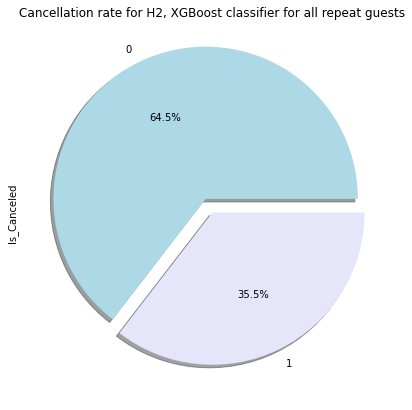

In [186]:
guest_pred = XGBmodel.predict(whatif_guest)
df = pd.DataFrame(data=guest_pred, columns=["Is_Canceled"])
df['Is_Canceled'].value_counts()
piedata = df['Is_Canceled'].value_counts()  # cancellation rate for pred based on test data set
my_colors = ['lightblue','lavender'] # custom colors
my_explode = (0.1,0) # custom effects
plt.figure(figsize=(7,7)) #custom size for the pie chart
piedata.plot.pie(autopct="%.1f%%",colors=my_colors,explode=my_explode,shadow=True) #pie chart creation
plt.title("Cancellation rate for H2, XGBoost classifier for all repeat guests")
plt.show() # displaying only chart without the extra information

In [187]:
accuracy = metrics.accuracy_score(Y, guest_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 84.13%


In [188]:
whatif_can = X.copy()
whatif_can['previous_cancellations'].value_counts()

0     73941
1      5155
2        72
3        51
11       35
4        25
6        22
5        16
13       12
21        1
Name: previous_cancellations, dtype: int64

In [189]:
whatif_can.loc[whatif_can.previous_cancellations!=0,"previous_cancellations"] = 0
whatif_can['previous_cancellations'].value_counts()
# replacing number of previous cancellations as zero

0    79330
Name: previous_cancellations, dtype: int64

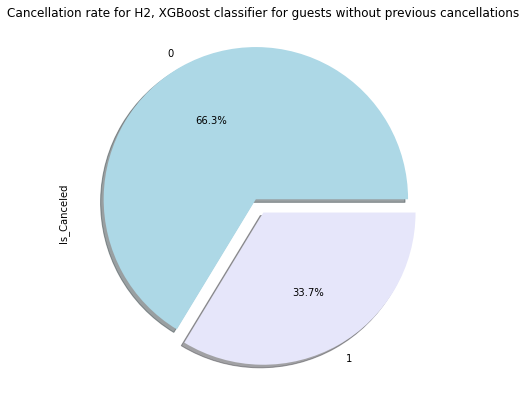

In [190]:
prevcan_pred = XGBmodel.predict(whatif_can)
df = pd.DataFrame(data=prevcan_pred, columns=["Is_Canceled"])
df['Is_Canceled'].value_counts()
piedata = df['Is_Canceled'].value_counts()  # cancellation rate for pred based on test data set
my_colors = ['lightblue','lavender'] # custom colors
my_explode = (0.1,0) # custom effects
plt.figure(figsize=(7,7)) #custom size for the pie chart
piedata.plot.pie(autopct="%.1f%%",colors=my_colors,explode=my_explode,shadow=True) #pie chart creation
plt.title("Cancellation rate for H2, XGBoost classifier for guests without previous cancellations")
plt.show() # displaying only chart without the extra information

In [191]:
accuracy = metrics.accuracy_score(Y, prevcan_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 82.51%


In [192]:
whatif_channel_corp = X.copy()
whatif_channel_corp['distribution_channel'].value_counts()

4    68945
2     6780
1     3408
3      193
5        4
Name: distribution_channel, dtype: int64

In [193]:
whatif_channel_corp.loc[whatif_channel_corp.distribution_channel==1,"distribution_channel"] = 1
whatif_channel_corp.loc[whatif_channel_corp.distribution_channel==2,"distribution_channel"] = 1
whatif_channel_corp.loc[whatif_channel_corp.distribution_channel==3,"distribution_channel"] = 1
whatif_channel_corp.loc[whatif_channel_corp.distribution_channel==4,"distribution_channel"] = 1
whatif_channel_corp.loc[whatif_channel_corp.distribution_channel==5,"distribution_channel"] = 1
# replace all distribution channel with 1, which corresponds to corporate
whatif_channel_corp['distribution_channel'].value_counts()

1    79330
Name: distribution_channel, dtype: int64

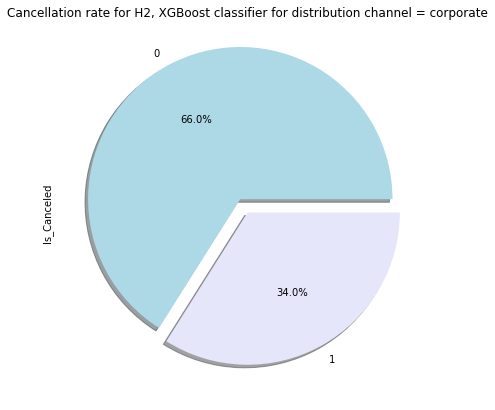

In [194]:
DC_corp_pred = XGBmodel.predict(whatif_channel_corp)
df = pd.DataFrame(data=DC_corp_pred, columns=["Is_Canceled"])
df['Is_Canceled'].value_counts()
piedata = df['Is_Canceled'].value_counts()  # cancellation rate for pred based on test data set
my_colors = ['lightblue','lavender'] # custom colors
my_explode = (0.1,0) # custom effects
plt.figure(figsize=(7,7)) #custom size for the pie chart
piedata.plot.pie(autopct="%.1f%%",colors=my_colors,explode=my_explode,shadow=True) #pie chart creation
plt.title("Cancellation rate for H2, XGBoost classifier for distribution channel = corporate")
plt.show() # displaying only chart without the extra information

In [195]:
accuracy = metrics.accuracy_score(Y, DC_corp_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 80.08%


In [196]:
whatif_spl = X.copy()
whatif_spl['total_of_special_requests'].value_counts()

0    47957
1    21420
2     8142
3     1587
4      198
5       26
Name: total_of_special_requests, dtype: int64

In [197]:
whatif_spl.loc[whatif_spl.total_of_special_requests==1,"total_of_special_requests"] = 5
whatif_spl.loc[whatif_spl.total_of_special_requests==2,"total_of_special_requests"] = 5
whatif_spl.loc[whatif_spl.total_of_special_requests==3,"total_of_special_requests"] = 5
whatif_spl.loc[whatif_spl.total_of_special_requests==4,"total_of_special_requests"] = 5
whatif_spl.loc[whatif_spl.total_of_special_requests==5,"total_of_special_requests"] = 5
whatif_spl.loc[whatif_spl.total_of_special_requests==0,"total_of_special_requests"] = 5
# replacing all data points with special requests = 5
whatif_spl['total_of_special_requests'].value_counts()

5    79330
Name: total_of_special_requests, dtype: int64

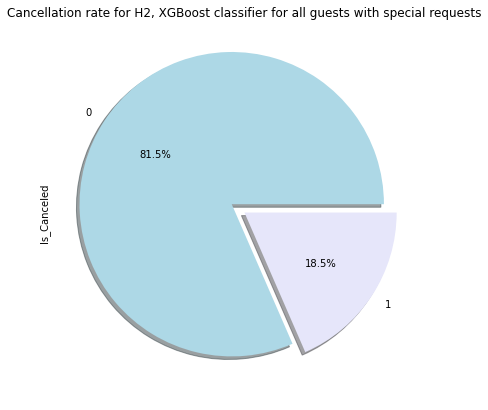

In [198]:
spl_pred = XGBmodel.predict(whatif_spl)
df = pd.DataFrame(data=spl_pred, columns=["Is_Canceled"])
df['Is_Canceled'].value_counts()
piedata = df['Is_Canceled'].value_counts()  # cancellation rate for pred based on test data set
my_colors = ['lightblue','lavender'] # custom colors
my_explode = (0.1,0) # custom effects
plt.figure(figsize=(7,7)) #custom size for the pie chart
piedata.plot.pie(autopct="%.1f%%",colors=my_colors,explode=my_explode,shadow=True) #pie chart creation
plt.title("Cancellation rate for H2, XGBoost classifier for all guests with special requests")
plt.show() # displaying only chart without the extra information

In [199]:
accuracy = metrics.accuracy_score(Y, spl_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 76.71%


In [200]:
whatif_car = X.copy()
whatif_car['required_car_parking_spaces'].value_counts()

0    77404
1     1921
2        3
3        2
Name: required_car_parking_spaces, dtype: int64

In [201]:
whatif_car.loc[whatif_car.required_car_parking_spaces==0,"required_car_parking_spaces"] = 1
whatif_car.loc[whatif_car.required_car_parking_spaces==2,"required_car_parking_spaces"] = 1
whatif_car.loc[whatif_car.required_car_parking_spaces==3,"required_car_parking_spaces"] = 1
#replacing all car parking requests with 1
whatif_car['required_car_parking_spaces'].value_counts()

1    79330
Name: required_car_parking_spaces, dtype: int64

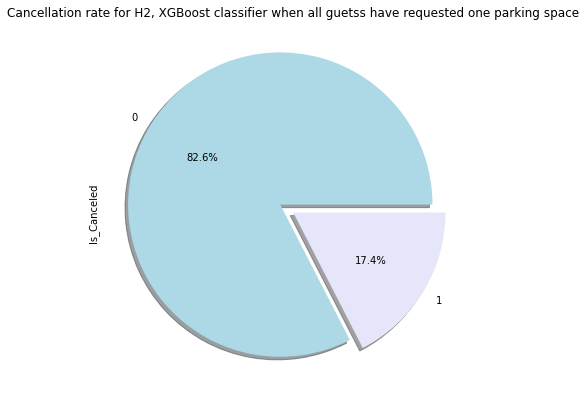

In [202]:
car_pred = XGBmodel.predict(whatif_car)
df = pd.DataFrame(data=car_pred, columns=["Is_Canceled"])
df['Is_Canceled'].value_counts()
piedata = df['Is_Canceled'].value_counts()  # cancellation rate for pred based on test data set
my_colors = ['lightblue','lavender'] # custom colors
my_explode = (0.1,0) # custom effects
plt.figure(figsize=(7,7)) #custom size for the pie chart
piedata.plot.pie(autopct="%.1f%%",colors=my_colors,explode=my_explode,shadow=True) #pie chart creation
plt.title("Cancellation rate for H2, XGBoost classifier when all guetss have requested one parking space")
plt.show() # displaying only chart without the extra information

In [203]:
accuracy = metrics.accuracy_score(Y, car_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 75.72%
